Diabetes Prediction System using Support Vector Machines(SVM's):
==

This dataset is originally from the __National Institute of Diabetes and Digestive and Kidney Diseases__. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


__Support Vector machines__ are **supervised learning** methods used for classification, regression and outliers detection.
The objective of the support vector machine algorithm is to find a __hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points__.


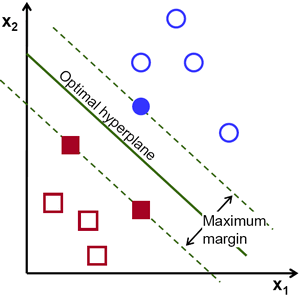

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a _plane that has the maximum margin_ , i.e the maximum distance between data points of both classes. __Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence__

__Hyperplanes are decision boundaries that help classify the data points.__

__Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.__

Refer to this link for more info: https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

The advantages of using support vector machines are:
1. Effective in high dimensional spaces.
2. Still effective in cases where number of dimensions is greater than the number of samples.
3. Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
4. Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

1. If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
2. SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).






1.Import the Dependencies:
==


In [1]:
import numpy as np 
import pandas as pd 
#Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn import svm 
from sklearn.metrics import accuracy_score


2.Data Collection & Preprocessing:
==

PIMA Diabetes Dataset - The dataset can be extracted either from Kaggle or from the google drive link as given below:
https://www.dropbox.com/s/uh7o7uyeghqkhoy/diabetes.csv?dl=0


It basically contains the data for the female and the other parameters such as insulin level, BMI, Pregnancies , Glucose, etc.


Outcome column is the label where 0->Non-Diabetic and 1-> Diabetic

In [2]:
# Load the csv file into the pandas dataframe

diabetes_df = pd.read_csv(r"C:\Users\17347\Sapna's Projects\Diabetes Prediction System\diabetes.csv")
# to print the first 5 rows of the dataset:

print(diabetes_df.head)

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [3]:
diabetes_df.shape
# we have 768 rows and 9 columns in the dataset

(768, 9)

In [4]:
#obtaining the statistical measureas of the data
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes_df['Outcome'].value_counts()
#0 => Non Daibetic 
#1 => Diabetic 

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
# to find the mean of each column for the diabetic and the non diabetic patients based on their outcome are as follows:
diabetes_df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [7]:
#seperating the data and labels 
x = diabetes_df.drop(columns = 'Outcome', axis = 1)
y = diabetes_df['Outcome']
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Data Standardization:
==
All the values for each column are different and thus it would be difficult for a machine learning model to make predictions.
So it is recommended to standardise the data to make better predictions 

In [8]:
scaler = StandardScaler()

In [9]:
standardized_data = scaler.fit_transform(x)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [10]:
# use the data that has been standardized as the input for the model 
x = standardized_data 


Train Test Split:
==

In [11]:
#stratify: If not None, data is split in a stratified fashion, using this as the class labels. 
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , stratify = y, random_state = 2)

In [12]:
print(x.shape,x_train.shape,x_test.shape,y_train.shape)

(768, 8) (614, 8) (154, 8) (614,)


Training the model using SVM (SVC -> Support Vector Classifier):
==

SVC => Support Vector Classification => The implementation is based on the libsvm. 
The fit time scales at least quadratically with the number of samples and may be impractical beyond
tens of thousands of samples. For large datasets consider using LinearSVC or SGDClassifier instead, 
possibly after a Nystroem transformer.

_**kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’**_
 
Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

We will be using a linear model 

In [13]:
classifier = svm.SVC(kernel = 'linear' )

In [14]:
#training the support vector machine classifier 
classifier.fit(x_train,y_train)

SVC(kernel='linear')

Model Evaluation: Accuracy Score:
==

In [15]:
#accuracy score on the training data 
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [16]:
print("Accuracy score of the training data:", training_data_accuracy)

Accuracy score of the training data: 0.7866449511400652


In [17]:
#accuracy score on the training data 
x_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)
print("Accuracy score of the test data:", test_data_accuracy)
# Since the accuracy score of the test data is 77% which is lesser than the accuracy of the training data which is 78% , the 
# model fails to perform well on the test data which may in turn lead to the problem of overfitting 
# so it is better to optimize the data and perform validation again 

Accuracy score of the test data: 0.7727272727272727


Making a Predictive System:
==

In [18]:
input_data = (4,110,92,0,0,37.6,0.191,30)

#changing the input_data to numpy array 
input_data_processed = np.asarray(input_data)

In [19]:
#reshape the array as we are predicting only for one instance out of all the 768 samples
input_data_reshaped = input_data_processed.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
if prediction[0] == 0:
    print("Patient is Non-Diabetic")
else:
    print("Patient is Diabetic")

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
Patient is Non-Diabetic


Saving the Trained model:
==

In [20]:
import pickle


In [21]:
filename = "diabetes_trained_model.sav"
pickle.dump(classifier, open(filename,'wb'))

In [22]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_trained_model.sav','rb'))

In [23]:
input_data = (4,110,92,0,0,37.6,0.191,30)

#changing the input_data to numpy array 
input_data_processed = np.asarray(input_data)
#reshape the array as we are predicting only for one instance out of all the 768 samples
input_data_reshaped = input_data_processed.reshape(1,-1)

# std_data = scaler.transform(input_data_reshaped)
# print(std_data)
# we are not using the standard scaler function here

prediction = loaded_model.predict(std_data)
if prediction[0] == 0:
    print("Patient is Non-Diabetic")
else:
    print("Patient is Diabetic")

Patient is Non-Diabetic
